# Ejemplo rápido: Monte Carlo
Un ejemplo rápido sobre la metodología Monte Carlo

El propósito es calcular numéricamente la siguente integral:

$$\int_{-0.5}^{0.5}\frac{-1}{\sqrt{1-\mu^2}}\mathrm{d}\mu$$

## 1. Importar módulos requeridos

In [1]:
import numpy as np # Algebra matricial
from math import sqrt # raíz cuadrada
import matplotlib.pyplot as plt # gráficos
import random # Simulacion aleatoria
random.seed( 0 ) # Fijando semilla (reproducir resultados)
np.random.seed( 0 ) # Fijando semilla (reproducir resultados)

## 2. Definir algunas funciones auxiliares

La función ```get_rand_number(a,b)``` genera números aleatorios uniformemente distribuidos en el intervalo ```a``` y ```b```

In [2]:
def get_rand_number(min_value, max_value): 
    return min_value + (max_value - min_value)*random.uniform(0,1)

La función ```f_of_x(x)``` calcula $\frac{-1}{\sqrt{1-x^2}}$

In [3]:
def f_of_x(x): return -1/(sqrt(1-x**2))

La función ```crude_monte_carlo(n,a,b)``` calcula la itegral numérica de ```f_of_x(x)``` en el intervalo ```a``` y ```b``` con ```n``` simulaciones

In [4]:
def crude_monte_carlo(num_samples=5000,lower_bound = -0.5,upper_bound = 0.5):
    """
    This function performs the Crude Monte Carlo for our specific function 
    f(x) on the range x=-0.5 to x=0.5.
    Args:
    - num_samples (float) : number of samples (optional)
    - lower_bound (float) : lower bound (optional)
    - upper_bound (float) : upper bound (optional)
    Return:
    - Crude Monte Carlo estimation (float)
    """
    sum_of_samples = 0
    for ii in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return float(sum_of_samples/num_samples)

## 3. Integrar

Visualisemos primero que estamos tratando de calcular

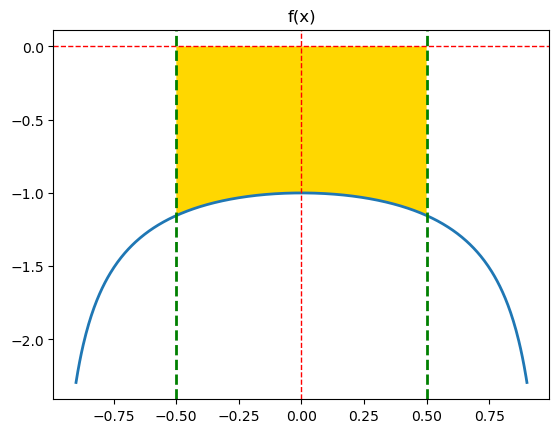

In [5]:
interval_x = np.linspace(-0.9, 0.9, 500)
range_y = list(map(f_of_x,interval_x))

fig, ax = plt.subplots()
line1, = ax.plot(interval_x, range_y, lw=2)
ax.set_title('f(x)')
ax.axhline(0, color='red', lw=1,ls='--')
ax.axvline(0, color='red', lw=1,ls='--')
ax.axvline(-0.5, color='green', lw=2,ls='--')
ax.axvline(0.5, color='green', lw=2,ls='--')
range_limit = np.repeat(f_of_x(-0.5),500)
ax.fill_between(interval_x, np.array(range_y), 0, where=range_y>=range_limit, facecolor='gold')

Ahora estimemos dicha integral con la simulacion de Monte Carlo para distintos tamaños de simulaciones

In [6]:
pw = 6
Estimation = np.ndarray(shape=(pw,1))
for ii in range(pw):
    Estimation[ii] = crude_monte_carlo(10**(ii+1))

Listo! ```Estimation_0```, ```Estimation_1```, ```Estimation_2```, ```Estimation_3``` y ```Estimation_4``` contienen las estimaciones numéricas

In [7]:
for ii in range(pw):
    print('Aproximación de Monte Carlo para f(x) con 10^%1.0f simulaciones: %1.5f'%(ii+1,Estimation[ii].item()))

Aproximación de Monte Carlo para f(x) con 10^1 simulaciones: -1.02049
Aproximación de Monte Carlo para f(x) con 10^2 simulaciones: -1.04630
Aproximación de Monte Carlo para f(x) con 10^3 simulaciones: -1.04870
Aproximación de Monte Carlo para f(x) con 10^4 simulaciones: -1.04663
Aproximación de Monte Carlo para f(x) con 10^5 simulaciones: -1.04739
Aproximación de Monte Carlo para f(x) con 10^6 simulaciones: -1.04719


Resulta que $\int\frac{-1}{\sqrt{1-x^2}}\mathrm{d}x$ es funcion conocida:

$$\arccos(x)=\int\frac{-1}{\sqrt{1-x^2}}\mathrm{d}x.$$

Por lo tanto 

$$\int_{-0.5}^{0.5}\frac{-1}{\sqrt{1-\mu^2}}\mathrm{d}\mu=\int_{-0.5}^{0.5}\mathrm{d}\arccos(\mu)=\arccos(\mu)\big|_{\mu=-0.5}^{\mu=0.5},$$

que es

In [8]:
Exact_value = np.arccos(0.5)-np.arccos(-0.5)
print('Valor exacto de f(x): %1.5f'%(Exact_value))

Valor exacto de f(x): -1.04720


Por lo que las approximaciones anteriores se equivocaron según

In [9]:
for ii in range(pw):
    err = abs((Exact_value-Estimation[ii])/Exact_value)*100
    print('Error de approximacion con 10^%1.0f simulaciones: %1.5f%%'%(ii+1,err.item()))

Error de approximacion con 10^1 simulaciones: 2.54994%
Error de approximacion con 10^2 simulaciones: 0.08579%
Error de approximacion con 10^3 simulaciones: 0.14329%
Error de approximacion con 10^4 simulaciones: 0.05456%
Error de approximacion con 10^5 simulaciones: 0.01853%
Error de approximacion con 10^6 simulaciones: 0.00034%
